<a href="https://colab.research.google.com/github/Gabrielvinicius27/DadosFarmaceuticosNotebooks/blob/master/Aula4AnaliseDadosFarmaceuticos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
sns.set()

url_dados = 'https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true'
dados_experimentos = pd.read_csv(url_dados, compression = 'zip')
dados_experimentos.columns = dados_experimentos.columns.str.replace('-','')
dados_experimentos.rename(columns={'droga':'composto'}, inplace = True)
dados_experimentos.head()

,id,tratamento,tempo,dose,composto,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,...,c60,c61,c62,c63,c64,c65,c66,c67,c68,c69,c70,c71,c72,c73,c74,c75,c76,c77,c78,c79,c80,c81,c82,c83,c84,c85,c86,c87,c88,c89,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


In [2]:
url_dados = 'https://github.com/alura-cursos/imersao-dados-desafio-final/blob/main/Dados/dados_resultados.csv?raw=true'
dados_resultados = pd.read_csv(url_dados)
dados_resultados.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,adrenergic_receptor_antagonist,akt_inhibitor,aldehyde_dehydrogenase_inhibitor,alk_inhibitor,ampk_activator,analgesic,androgen_receptor_agonist,androgen_receptor_antagonist,anesthetic_-_local,angiogenesis_inhibitor,angiotensin_receptor_antagonist,anti-inflammatory,antiarrhythmic,antibiotic,anticonvulsant,antifungal,antihistamine,antimalarial,antioxidant,antiprotozoal,antiviral,apoptosis_stimulant,aromatase_inhibitor,atm_kinase_inhibitor,atp-sensitive_potassium_channel_antagonist,atp_synthase_inhibitor,atpase_inhibitor,atr_kinase_inhibitor,aurora_kinase_inhibitor,...,protein_synthesis_inhibitor,protein_tyrosine_kinase_inhibitor,radiopaque_medium,raf_inhibitor,ras_gtpase_inhibitor,retinoid_receptor_agonist,retinoid_receptor_antagonist,rho_associated_kinase_inhibitor,ribonucleoside_reductase_inhibitor,rna_polymerase_inhibitor,serotonin_receptor_agonist,serotonin_receptor_antagonist,serotonin_reuptake_inhibitor,sigma_receptor_agonist,sigma_receptor_antagonist,smoothened_receptor_antagonist,sodium_channel_inhibitor,sphingosine_receptor_agonist,src_inhibitor,steroid,syk_inhibitor,tachykinin_antagonist,tgf-beta_receptor_inhibitor,thrombin_inhibitor,thymidylate_synthase_inhibitor,tlr_agonist,tlr_antagonist,tnf_inhibitor,topoisomerase_inhibitor,transient_receptor_potential_channel_antagonist,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [3]:
dados_resultados.describe().T

,count,mean,std,min,25%,50%,75%,max
5-alpha_reductase_inhibitor,23814.0,0.000714,0.026709,0.0,0.0,0.0,0.0,1.0
11-beta-hsd1_inhibitor,23814.0,0.000756,0.027483,0.0,0.0,0.0,0.0,1.0
acat_inhibitor,23814.0,0.001008,0.031731,0.0,0.0,0.0,0.0,1.0
acetylcholine_receptor_agonist,23814.0,0.007979,0.088967,0.0,0.0,0.0,0.0,1.0
acetylcholine_receptor_antagonist,23814.0,0.012640,0.111716,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
ubiquitin_specific_protease_inhibitor,23814.0,0.000252,0.015871,0.0,0.0,0.0,0.0,1.0
vegfr_inhibitor,23814.0,0.007139,0.084190,0.0,0.0,0.0,0.0,1.0
vitamin_b,23814.0,0.001092,0.033025,0.0,0.0,0.0,0.0,1.0
vitamin_d_receptor_agonist,23814.0,0.001638,0.040436,0.0,0.0,0.0,0.0,1.0


In [4]:
dados_resultados['acat_inhibitor'].unique()

array([0, 1])

In [5]:
contagem_moa = dados_resultados.select_dtypes('int64').sum().sort_values(ascending = False)
contagem_moa

nfkb_inhibitor                                832
proteasome_inhibitor                          726
cyclooxygenase_inhibitor                      435
dopamine_receptor_antagonist                  424
serotonin_receptor_antagonist                 404
                                             ... 
protein_phosphatase_inhibitor                   6
autotaxin_inhibitor                             6
diuretic                                        6
erbb2_inhibitor                                 1
atp-sensitive_potassium_channel_antagonist      1
Length: 206, dtype: int64

In [6]:
dados_resultados['n_moa'] = dados_resultados.drop('id', axis = 1).sum(axis = 1)
dados_resultados['ativo_moa'] = (dados_resultados['n_moa'] != 0)
dados_resultados.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,adrenergic_receptor_antagonist,akt_inhibitor,aldehyde_dehydrogenase_inhibitor,alk_inhibitor,ampk_activator,analgesic,androgen_receptor_agonist,androgen_receptor_antagonist,anesthetic_-_local,angiogenesis_inhibitor,angiotensin_receptor_antagonist,anti-inflammatory,antiarrhythmic,antibiotic,anticonvulsant,antifungal,antihistamine,antimalarial,antioxidant,antiprotozoal,antiviral,apoptosis_stimulant,aromatase_inhibitor,atm_kinase_inhibitor,atp-sensitive_potassium_channel_antagonist,atp_synthase_inhibitor,atpase_inhibitor,atr_kinase_inhibitor,aurora_kinase_inhibitor,...,radiopaque_medium,raf_inhibitor,ras_gtpase_inhibitor,retinoid_receptor_agonist,retinoid_receptor_antagonist,rho_associated_kinase_inhibitor,ribonucleoside_reductase_inhibitor,rna_polymerase_inhibitor,serotonin_receptor_agonist,serotonin_receptor_antagonist,serotonin_reuptake_inhibitor,sigma_receptor_agonist,sigma_receptor_antagonist,smoothened_receptor_antagonist,sodium_channel_inhibitor,sphingosine_receptor_agonist,src_inhibitor,steroid,syk_inhibitor,tachykinin_antagonist,tgf-beta_receptor_inhibitor,thrombin_inhibitor,thymidylate_synthase_inhibitor,tlr_agonist,tlr_antagonist,tnf_inhibitor,topoisomerase_inhibitor,transient_receptor_potential_channel_antagonist,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor,n_moa,ativo_moa
0,id_000644bb2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,True
1,id_000779bfc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
2,id_000a6266a,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,True
3,id_0015fd391,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
4,id_001626bd3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,True


In [7]:
dados_combinados = pd.merge(dados_experimentos, dados_resultados[['id','n_moa', 'ativo_moa']], 
                            on = 'id')

In [8]:
dados_combinados.head()

,id,tratamento,tempo,dose,composto,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,...,c62,c63,c64,c65,c66,c67,c68,c69,c70,c71,c72,c73,c74,c75,c76,c77,c78,c79,c80,c81,c82,c83,c84,c85,c86,c87,c88,c89,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99,n_moa,ativo_moa
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,1,True
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0,False
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,3,True
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,0,False
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,1,True


In [9]:
dados_combinados.query('tratamento == "com_controle"')['ativo_moa'].value_counts()

False    1866
Name: ativo_moa, dtype: int64

In [10]:
dados_combinados.query('tratamento == "com_droga"')['ativo_moa'].value_counts()

True     14447
False     7501
Name: ativo_moa, dtype: int64

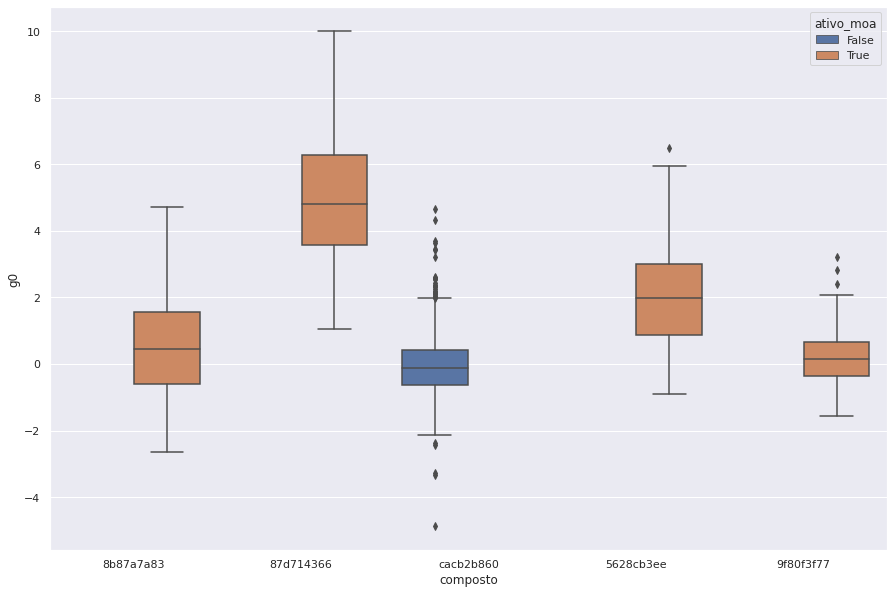

In [11]:
compostos_principais = dados_combinados['composto'].value_counts().index[0:5]
plt.figure(figsize=(15,10))
sns.boxplot(data = dados_combinados.query('composto in @compostos_principais'), 
            y='g0', x='composto', hue = 'ativo_moa')

#Desafio 1: Encontrar um top 10, das ações do MOA

[]

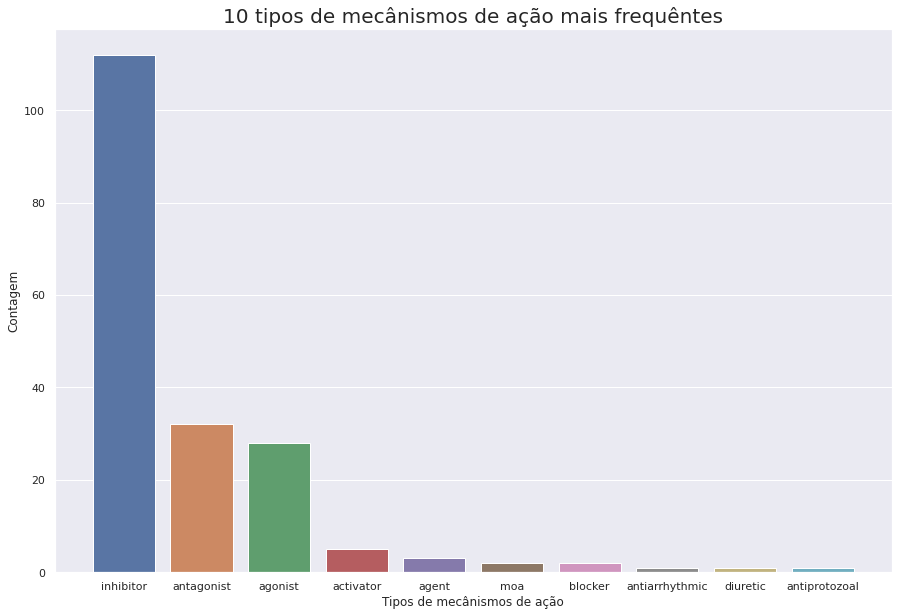

In [12]:
sufixo = [valor.split('_')[-1] for valor in dados_resultados.columns]
sufixo = pd.Series(sufixo)

sufixo_top10 = sufixo.value_counts()[0:10]
plt.figure(figsize = (15,10))
ax = sns.barplot(x = sufixo_top10.index, y = sufixo_top10.values)
ax.set(xlabel = 'Tipos de mecânismos de ação', ylabel = 'Contagem')
ax.set_title('10 tipos de mecânismos de ação mais frequêntes', fontdict = {'fontsize':20})
plt.plot()

# Desafio 2: Criar uma nova coluna eh_controle

In [13]:
dados_combinados['eh_controle'] = (dados_combinados['tratamento'] == "com_controle")

In [14]:
dados_combinados[['tratamento','eh_controle']]

,tratamento,eh_controle
0,com_droga,False
1,com_droga,False
2,com_droga,False
3,com_droga,False
4,com_droga,False
...,...,...
23809,com_droga,False
23810,com_droga,False
23811,com_controle,True
23812,com_droga,False


#Desafio 03: Criar três colunas para indicar o tempo 24, 48, 72

In [15]:
dados_combinados['tempo_copy'] = dados_combinados['tempo']
dados_combinados = pd.get_dummies(dados_combinados, prefix = 'tempo', columns=['tempo_copy'])
print(dados_combinados[['tempo', 'tempo_24', 'tempo_48', 'tempo_72']])

       tempo  tempo_24  tempo_48  tempo_72
0         24         1         0         0
1         72         0         0         1
2         48         0         1         0
3         48         0         1         0
4         72         0         0         1
...      ...       ...       ...       ...
23809     24         1         0         0
23810     24         1         0         0
23811     48         0         1         0
23812     24         1         0         0
23813     72         0         0         1

[23814 rows x 4 columns]


#Desafio 04: Estudar sobre combinações de DF https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html


In [16]:
tabela_a = pd.DataFrame({'animal':['coelho','cachorro','gorila','elefante','peixe']})
tabela_b = pd.DataFrame({'animal':['gorila','gato','leão','tubarão','peixe']})
print("TABELA A\n")
print(tabela_a)
print('\nTABELA B\n')
print(tabela_b)

TABELA A

     animal
0    coelho
1  cachorro
2    gorila
3  elefante
4     peixe

TABELA B

    animal
0   gorila
1     gato
2     leão
3  tubarão
4    peixe


1. Método INNER, traz apenas o que é comum nas duas tabelas, intersecção das chaves



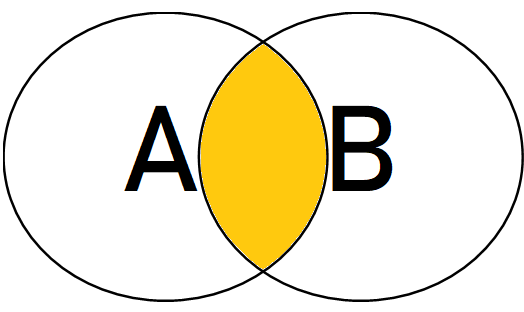




In [17]:
pd.merge(tabela_a, tabela_b, how = 'inner', on = 'animal')

,animal
0,gorila
1,peixe


2. Método LEFT, traz apenas as chaves da primeira coluna

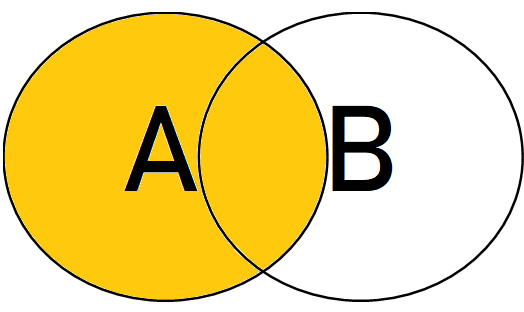

In [18]:
pd.merge(tabela_a, tabela_b, how = 'left', on = 'animal')

,animal
0,coelho
1,cachorro
2,gorila
3,elefante
4,peixe


3. Método RIGHT, tras apenas as chaves da segunda tabela

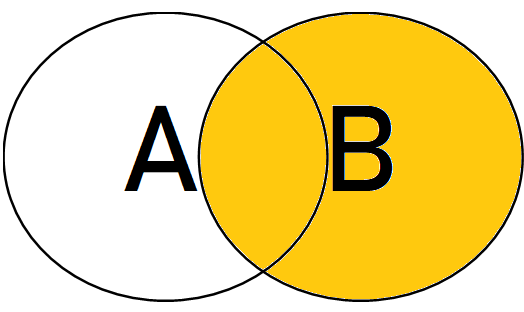

In [19]:
pd.merge(tabela_a, tabela_b, how = 'right', on = 'animal')

,animal
0,gorila
1,gato
2,leão
3,tubarão
4,peixe


4. Método OUTER, traz as chaves de ambas as tabelas, união das chaves

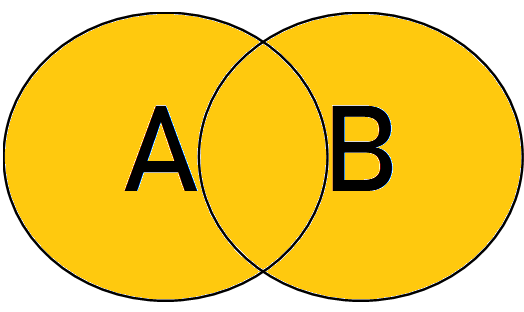

In [20]:
pd.merge(tabela_a, tabela_b, how = 'outer', on = 'animal')

,animal
0,coelho
1,cachorro
2,gorila
3,elefante
4,peixe
5,gato
6,leão
7,tubarão


#Desafio 05: Fazer analise mais detalhada considerando tempo e dose para comparar as distribuições (Um composto especifico)


Text(0.5, 1.0, 'Boxplot Dose')

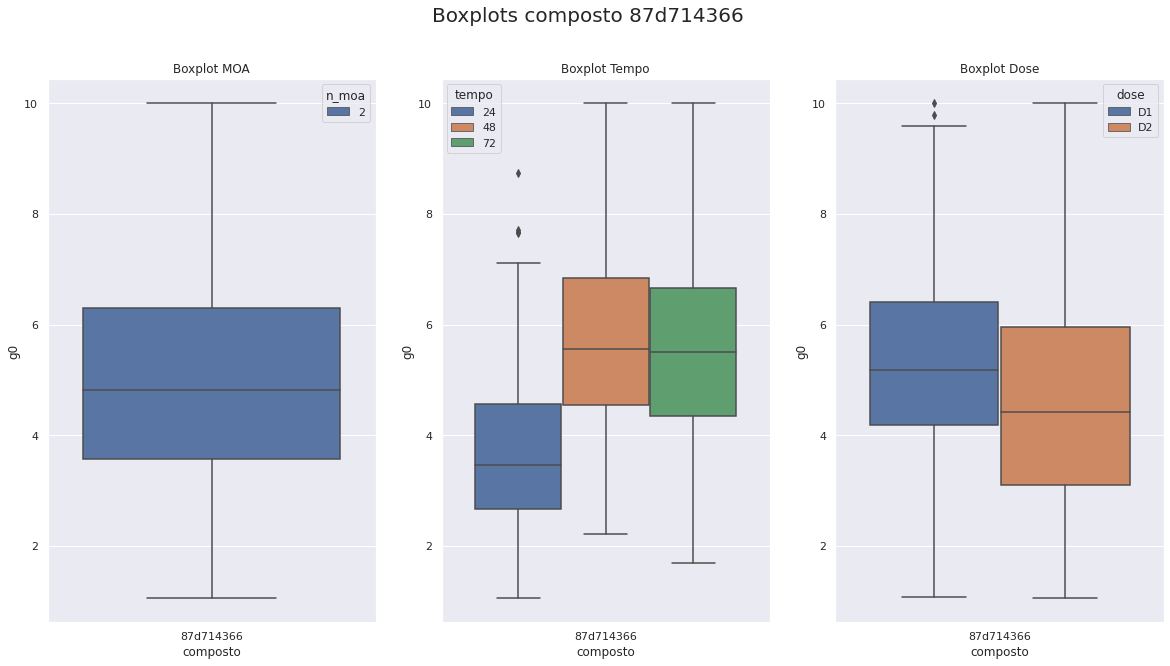

In [21]:
composto_principal = dados_combinados['composto'].value_counts().index[1]
fig, axes = plt.subplots(1, 3, figsize = (20,10))
fig.suptitle('Boxplots composto {}'.format(composto_principal), fontsize = 20)
sns.boxplot(ax = axes[0], 
            data = dados_combinados.query('composto in @composto_principal'), 
            y='g0', x='composto', hue = 'n_moa')
axes[0].set_title('Boxplot MOA')
sns.boxplot(ax = axes[1], 
            data = dados_combinados.query('composto in @composto_principal'), 
            y='g0', x='composto', hue = 'tempo')
axes[1].set_title('Boxplot Tempo')
sns.boxplot(ax = axes[2], 
            data = dados_combinados.query('composto in @composto_principal'), 
            y='g0', x='composto', hue = 'dose')
axes[2].set_title('Boxplot Dose')

#Desafio 06: Descobrir se temos algum composto que dependendo da configuração do experimênto ativa ou não ativa o MOA


In [49]:
pd.merge(dados_combinados[['composto','ativo_moa']].query('ativo_moa == True'), 
         dados_combinados[['composto','ativo_moa']].query('ativo_moa == False'), 
         on = 'composto')

,composto,ativo_moa_x,ativo_moa_y


Ao tentar fazer merge buscando compostos que tenham MOA ativo e MOA inativo não foi possível encontrar resultados, ou seja, não há compostos que em um experimento ative MOA e em outro experimento não ative MOA

#Desafio 07: Descobrir se temos algum composto que dependendo da configuração do experimênto ativa MOAS diferentes


O código abaixo traz os valores de n_moa para cada composto

In [67]:
for composto in set(dados_combinados['composto'][:3]):
    print(dados_combinados.query('composto == @composto')['n_moa'])

1        0
5389     0
6070     0
12328    0
14089    0
19987    0
Name: n_moa, dtype: int64
0        1
6175     1
13774    1
14257    1
20190    1
22507    1
Name: n_moa, dtype: int64
2        3
3590     3
3911     3
8457     3
11030    3
14446    3
15218    3
Name: n_moa, dtype: int64


O desvio padrão mostra o quanto um valor é uniforme
utilizando como exemplo o composto em que todos os valores n_moa são iguais a 3 o calculo do desvio padrão ocorre da seguinte forma:

* Temos 7 ocorrencias então n = 7;
* A média (M) de todas as ocorrencias é = 3;
* A ocorrencia i = 3 menos a média de todas as ocorrencias é = 0;
* O somatório em todas as ocorrências será 0 caso o valor de n_moa não variar;
* Finalizando os calculos veremos que o desvio padrão será 0 se os valores de n_moa forem os mesmos para todas as ocorrências.

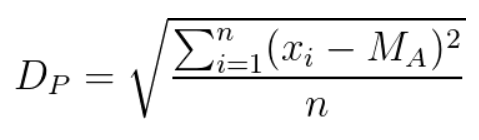

O código abaixo calcula o desvio padrão dos valores de n_moa em todos os compostos e os armazena em uma lista, ao final é consultado todos os valores unicos da lista, o unico valor é 0, ou seja todos os desvios padrões são 0

In [68]:
desvios = list()
for composto in set(dados_combinados['composto']):
    desvios.append(np.std(dados_combinados.query('composto == @composto')['n_moa']))

print('Valores unicos da lista de desvio padrão são : {}'.format(set(desvios)))

Valores unicos da lista de desvio padrão são : {0.0}


Conclui-se, que como todos os desvios padrões são 0 então o valor de n_moa não variou em nenhum composto, para todas as experiencias feitas em um composto ele sempre ativou o mesmo número de compostos, ou não ativou composto algum.

#Desafio 08: Resumo


Na aula 4 foi possível entender melhor sobre os resultados dos experimentos, os principais tópicos abordados foram:

* Conceitos sobre mecânismos de ação;
* Função merge do pandas;
* Experimentos com doses e tempos diferentes podem afetar o comportamento do composto em um gene;
* Experimentos diferentes não alteram o número de mecânismos de ação que um composto ativa. 